In [148]:
# Author: Evgenii Zorin
# Datasets are taken from Kaggle

# Population dataset 1

First, let's take a look at a dataset from Kaggle which describes distribution of people by different age groups (0-19, 20-39, 40-59, and 60+) and sex (male, female) in different countries. The source is taken from: https://www.kaggle.com/alizahidraja/world-population-by-age-group-2020. 

Initially, the dataset was imported and processed to convert the numbers into millions, i.e. 1000000 into 1 million:

In [161]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = pd.read_csv('WorldPopulationByAge2020_proc.csv')
df['PopTotal'] = df['PopTotal'] * 1000
df['PopTotalMln'] = df['PopTotal'] / 1000000
df


,Location,AgeGrp,PopMale,PopFemale,PopTotal,PopTotalMln
0,Afghanistan,0-19,10709.0,10197.0,20906000.0,20.906
1,Afghanistan,20-39,5994.0,5574.0,11568000.0,11.568
2,Afghanistan,40-59,2485.0,2316.0,4801000.0,4.801
3,Afghanistan,60+,781.0,858.0,1639000.0,1.639
4,Africa,0-19,344109.0,334982.0,679091000.0,679.091
...,...,...,...,...,...,...
851,Zambia,60+,258.0,365.0,623000.0,0.623
852,Zimbabwe,0-19,3941.0,3923.0,7864000.0,7.864
853,Zimbabwe,20-39,1993.0,2354.0,4347000.0,4.347
854,Zimbabwe,40-59,892.0,1060.0,1952000.0,1.952


Then, we can aim to answer different questions about the dataset. 

## Which 5 countries in this dataset have the largest and smallest population sizes? 

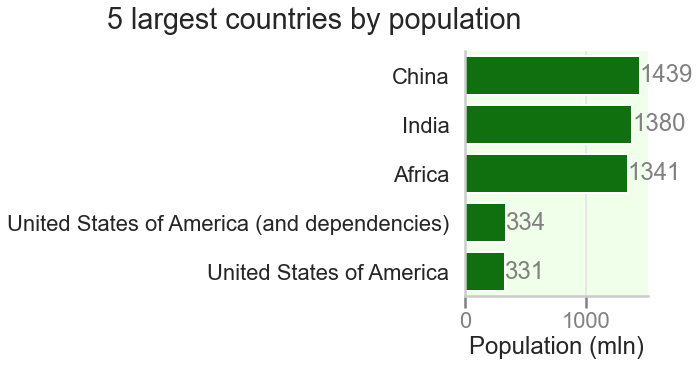

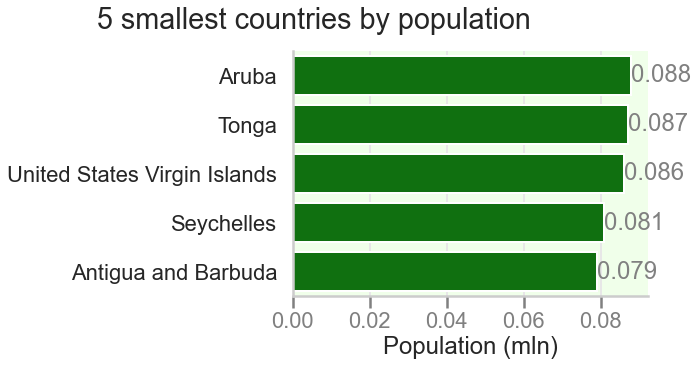

In [163]:
def N_countries(N: int, size: str):
	"""
	Function that makes a bargraph of populations (in millions) of the N largest/smallest countries in the dataset.
	
	Parameters:
	---
		N
			integer, how many countries to consider
		size = ``['largest', 'smallest']``
			str, show largest or smallest countries? 
	
	Example usage:
	---
		``N_countries(5, 'largest')``
	"""
	df3 = df.groupby('Location', as_index=False)['PopTotalMln'].sum()
	df3.sort_values(by='PopTotalMln', inplace=True, ascending=False)
	df3 = df3[df3['Location'] != 'World']
	if size == 'largest': 
		df3 = df3.head(N)
	elif size == 'smallest': 
		df3 = df3.tail(N)
	bargraph = sns.catplot(
		x='PopTotalMln', y='Location', 
		data=df3, 
		kind='bar', color='green', orient='h', aspect=2
	)
	bargraph.set_axis_labels("Population (mln)", "")
	bargraph.fig.suptitle(f'{N} {size} countries by population', y=1.05)
	for iter, i in enumerate(df3['PopTotalMln']):
		if size == 'largest':
			plt.text(x=df3['PopTotalMln'].iloc[iter], y=iter, s=round(df3['PopTotalMln'].iloc[iter]), ha='left', va='center', color='grey')
		elif size == 'smallest':
			plt.text(x=df3['PopTotalMln'].iloc[iter], y=iter, s=round(df3['PopTotalMln'].iloc[iter], 3), ha='left', va='center', color='grey')
	sns.set_context('poster')
	sns.set_style('whitegrid', {
		'axes.facecolor': '#F0FFEA',
		'grid.color': '#E7E7E7',
		'xtick.color': 'grey',
		'xtick.bottom': True, 
	})

N_countries(5, 'largest')
N_countries(5, 'smallest')


From the graphs above, we can see that the largest countries, such as China and India, have more than 1 billion people. Africa is not a country, but still gives an interesting estimation of the total amount of people on the continent. 

## Which of the countries - UK, USA, Belgium, or Russia - has the largest population?

Below is the script for comparing populations of chosen countries:

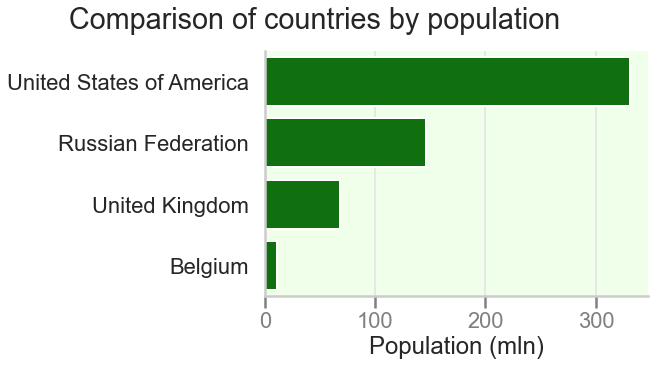

In [164]:
def bargraph_popByCountry2(countries:list):
	"""
	Given a list of countries as an argument, graph the bar graph of the ascending population size of those countries
	"""
	df2 = df.groupby('Location', as_index=False)['PopTotalMln'].sum()
	df2.sort_values(by='PopTotalMln', inplace=True, ascending=False)
	bargraph = sns.catplot(
		x='PopTotalMln', y='Location', 
		data=df2[df2['Location'].isin(countries)], 
		kind='bar', color='green', orient='h', aspect=2
	)
	sns.set_context('poster')
	bargraph.fig.suptitle(f'Comparison of countries by population', y=1.05)
	bargraph.set_axis_labels("Population (mln)", "")


countryList = ['United Kingdom', 'United States of America', 'Belgium', 'Russian Federation']
bargraph_popByCountry2(countryList)

## In the four countries - UK, USA, Belgium, and Russia - what is the distribution of population by age groups? 

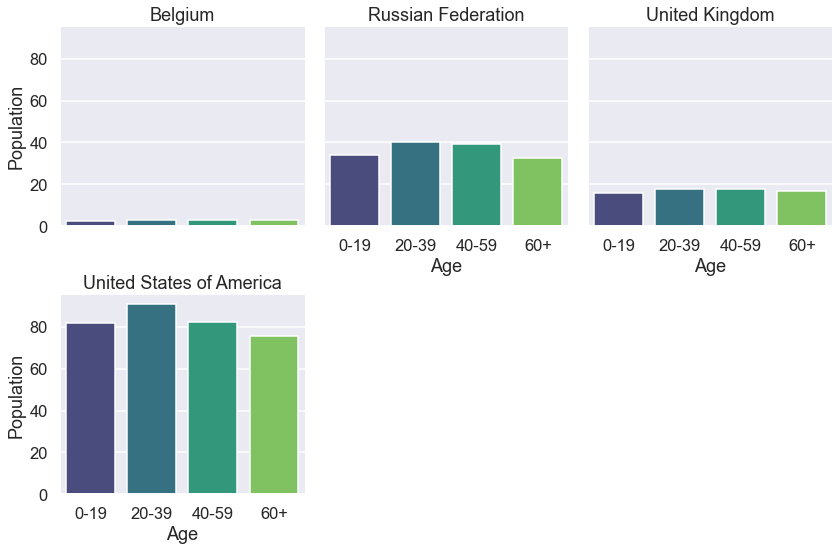

In [166]:
def bargraph_popByAge(countries:list):
	# plt.figure(figsize=(20, 10))
	bargraph = sns.catplot(
		x='AgeGrp', y='PopTotalMln',
		data=df[df['Location'].isin(countries)],
		col='Location', col_wrap=3, kind='bar', height=4, palette='viridis'
	)
	bargraph.set_titles("{col_name}")
	bargraph.set_axis_labels("Age", "Population")
	sns.set_style('darkgrid')
	sns.set_context('talk')

bargraph_popByAge(countryList)

# Population dataset 2

Now we can explore another dataset from Kaggle, this time with population density (in people per sq.km of land) over time (1961-2015) (https://www.kaggle.com/datasets/walla2ae/world-population?select=API_EN.POP.DNST_DS2_en_csv_v2.csv).

In [167]:
df = pd.read_csv('API_EN.POP.DNST_DS2_en_csv_v2.csv', skiprows=4)
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,307.972222,312.366667,314.983333,316.827778,318.666667,...,563.011111,563.422222,564.427778,566.311111,568.850000,571.783333,574.672222,577.161111,NaN,NaN
1,Andorra,AND,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,30.587234,32.714894,34.914894,37.170213,39.470213,...,182.161702,181.859574,179.614894,175.161702,168.757447,161.493617,154.863830,149.942553,NaN,NaN
2,Afghanistan,AFG,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,14.038148,14.312061,14.599692,14.901579,15.218206,...,40.634655,41.674005,42.830327,44.127634,45.533197,46.997059,48.444546,49.821649,NaN,NaN


## Countries with the highest population density in 2015

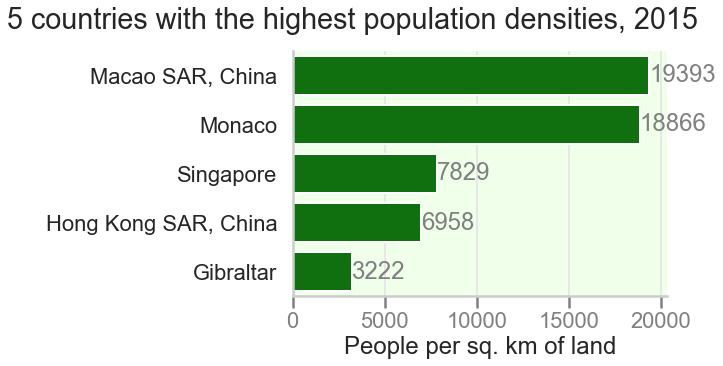

In [169]:
def Nlargest(N):
	df.sort_values(by='2015', inplace=True, ascending=False)
	df3 = df.head(N)
	bargraph = sns.catplot(
		x='2015', y='Country Name', 
		data=df3, 
		kind='bar', color='green', orient='h', aspect=2
	)
	bargraph.fig.suptitle(f'{N} countries with the highest population densities, 2015', y=1.05)
	bargraph.set_axis_labels("People per sq. km of land", "")
	sns.set_context('poster')
	# sns.set_context('poster')
	sns.set_style('whitegrid', {
		'axes.facecolor': '#F0FFEA',
		'grid.color': '#E7E7E7',
		'xtick.color': 'grey',
		'xtick.bottom': True, 
	})
	for iter, i in enumerate(df3['2015']):
		plt.text(x=df3['2015'].iloc[iter], y=iter, s=round(df3['2015'].iloc[iter]), ha='left', va='center', color='grey')

Nlargest(5)

## Time series for the selected countries

We can put the names of all available countries within a list. 
Then, perhaps we are unsure on how the United States of America is written in this dataset. To find this out, we can search the list of country names by their first letter: 

In [170]:
def firstLetterName(a: str):
	allCountries = [i for i in df['Country Name']]; allCountries.sort()
	CountriesStartingWithLetter = [i for i in allCountries if i[0] == a.upper()]
	return CountriesStartingWithLetter

firstLetterName('U')

['Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Upper middle income',
 'Uruguay',
 'Uzbekistan']

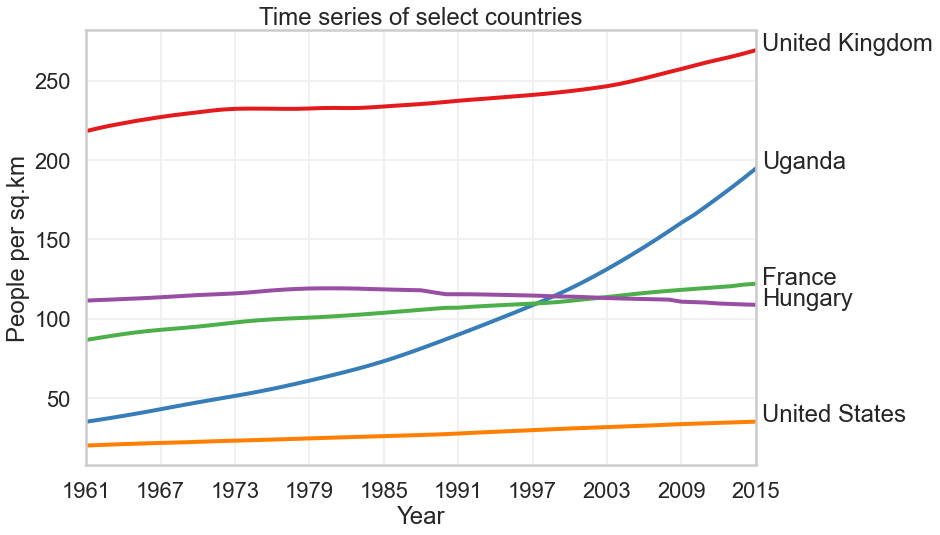

In [172]:
# Now let's graph a time series for the selected countries

df2 = pd.melt(df, id_vars=['Country Name'], value_vars=[str(i) for i in range(1961, 2016)] )
df2.rename(columns={'variable': 'Year', 'value': 'People per sq.km'}, inplace=True)
df2['Year'] = df2['Year'].astype(int)

def lineplot(countries):
	plt.figure(figsize=(12,8))
	sns.lineplot(
		x='Year', y='People per sq.km', data=df2[df2['Country Name'].isin(countries)], hue='Country Name', legend=False,
		palette='Set1', linewidth=4
	)
	plt.title('Time series of select countries')
	plt.xticks(ticks=[i for i in range(1961, 2016, 6)])
	sns.set_context('poster')
	sns.set_style('whitegrid', {'grid.color': '0.94'})
	plt.margins(x=0)
	for i in countries:
		df3 = df2[(df2['Country Name'] == i) & (df2['Year'] == 2015)]
		plt.text(x=2015+0.5, y=df3['People per sq.km'].iloc[0], s=i)

lineplot(['United Kingdom', 'United States', 'France', 'Hungary', 'Uganda'])
